# ShapOnImage

In [1]:
from shap_on_image.ShapOnImage import ShapOnImage

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
image = 'image_test.jpg'
features = ['RShoulder', 'LShoulder', 'RHip', 'LHip']
shap = [4.23, 2.13, -1.21, -5.21]

In [3]:
# Init class with image, features and shap values
ShapIm = ShapOnImage(image, features, shap)

In [4]:
# Use tool to get positions of features
ShapIm.set_positions()

Positions for RShoulder 344 305
Positions for LShoulder 654 445
Positions for RHip 400 146
Positions for LHip 183 445


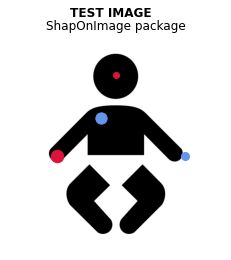

In [5]:
# Plot single observation image with suptitle and title
suptitle = "TEST IMAGE"
title = "ShapOnImage package"
ShapIm.plot(suptitle=suptitle, title=title, alpha=30)

# ShapOnImageAuto

In [1]:
from shap_on_image.ShapOnImageAuto import ShapOnImageAuto
image = 'image_test.jpg'
features = ['R', 'L', 'S', 'W', 'X', 'J']
shap = {
    'bdd1': {'R': 3, 'L':2, 'W': -4, 'J': -8},
    'bdd2': {'R': 5, 'S': -2, 'L': -7, 'X': 12}}

In [3]:
positions = {'R': {'x': 302, 'y': 317},
 'L': {'x': 493, 'y': 313},
 'S': {'x': 317, 'y': 505},
 'W': {'x': 467, 'y': 501},
 'X': {'x': 400, 'y': 155},
 'J': {'x': 408, 'y': 403}}

In [4]:
ShapImAuto = ShapOnImageAuto(image=image, features=features, shap=shap, positions=positions)

In [3]:
ShapImAuto.set_positions()

Positions for R 312 316
Positions for L 479 318
Positions for S 299 526
Positions for W 493 529
Positions for X 420 407
Positions for J 

: 

: 

In [ ]:
ShapImAuto.get_positions()

In [ ]:
# ShapImAuto = ShapOnImageAuto(image=image, features=features, shap=shap, positions=positions)

In [5]:
ShapImAuto.create_plots("outputs/", alpha=20)

bdd1
bdd2


# Automatisation

In [1]:
import pandas as pd
from shap_on_image.ShapOnImageAuto import ShapOnImageAuto

In [2]:
image = 'bebe.jpg'

In [3]:
features =  ["RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","RHip",
        "RKnee","RAnkle","LHip","LKnee","LAnkle","LShoulder-LElbow","RShoulder-RElbow",
        "LElbow-LWrist","RElbow-RWrist","LHip-LKnee","RHip-RKnee","LKnee-LAnkle","RKnee-RAnkle",
        "up_right","up_left","down_right","down_left"]
features_1 =  ["RShoulder","RElbow","RWrist","LShoulder","LElbow","LWrist","RHip","RKnee","RAnkle","LHip","LKnee","LAnkle"]
features_2 =  ["LShoulder-LElbow","RShoulder-RElbow","LElbow-LWrist","RElbow-RWrist","LHip-LKnee","RHip-RKnee","LKnee-LAnkle","RKnee-RAnkle"]
#features_3 = ["top_right","top_left","bot_right","bot_left"]
features_3 = ["up_right","up_left","down_right","down_left"]

In [4]:
from os import listdir
from os.path import isfile, join
path = 'outputs_shap'
files = [f for f in listdir(path) if isfile(join(path, f))]

In [6]:
shap = {}
for bdd in files:
    values = pd.read_csv(path + '/' + bdd)
    if 'Unnamed: 0' in values.columns:
        values = values.drop(['Unnamed: 0'], axis=1)
    shap[bdd[:-4]] = values.to_dict("records")
    

In [7]:
ShapImAuto = ShapOnImageAuto(image, features, shap)

In [8]:
ShapImAuto.set_positions()

Positions for RShoulder 253 149
Positions for RElbow 174 282
Positions for RWrist 97 438
Positions for LShoulder 562 148
Positions for LElbow 654 276
Positions for LWrist 738 399
Positions for RHip 395 342
Positions for RKnee 323 437
Positions for RAnkle 240 582
Positions for LHip 574 331
Positions for LKnee 628 430
Positions for LAnkle 734 572
Positions for LShoulder-LElbow 293 204
Positions for RShoulder-RElbow 202 341
Positions for LElbow-LWrist 614 196
Positions for RElbow-RWrist 742 332
Positions for LHip-LKnee 418 377
Positions for RHip-RKnee 315 508
Positions for LKnee-LAnkle 634 372
Positions for RKnee-RAnkle 720 511
Positions for up_right 342 263
Positions for up_left 540 268
Positions for down_right 273 528
Positions for down_left 488 524


In [9]:
ShapImAuto.create_plots("outputs_ShapOnImageAuto/", alpha=50)